In [58]:
import numpy as np
import matplotlib.pyplot as plt

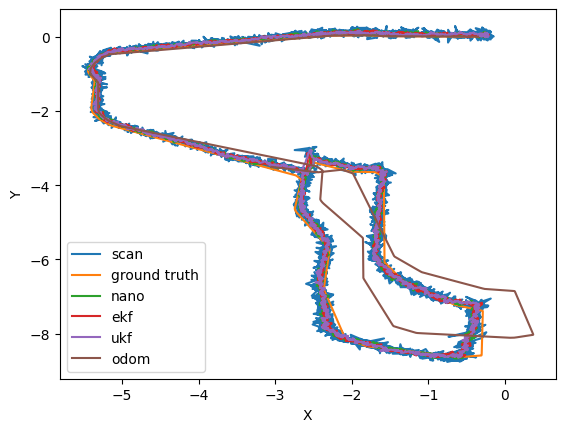

In [59]:
data = np.load("./data/sim/data.npz")
scan_pose = np.load("./results/scan_pose.npy")
ekf = np.load("./results/ekf.npy")
ukf = np.load("./results/ukf.npy")
odom = np.load("./results/odom.npy")
pf = np.load("./results/pf.npy")
nano = np.load("./results/nano.npy")
ground_truth = data["ground_truth"]
l = int(len(ground_truth) * 1) - 1
time_gt = data["ground_truth_t"]
plt.plot(scan_pose[:l, 0], scan_pose[:l, 1], label="scan")
plt.plot(ground_truth[:l, 0], ground_truth[:l, 1], label="ground truth")
plt.plot(nano[:l, 0], nano[:l, 1], label="nano")
# plt.plot(pf[:l, 0], pf[:l, 1], label="pf")
plt.plot(ekf[:l, 0], ekf[:l, 1], label="ekf")
plt.plot(ukf[:l, 0], ukf[:l, 1], label="ukf")
plt.plot(odom[:l, 0], odom[:l, 1], label="odom")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

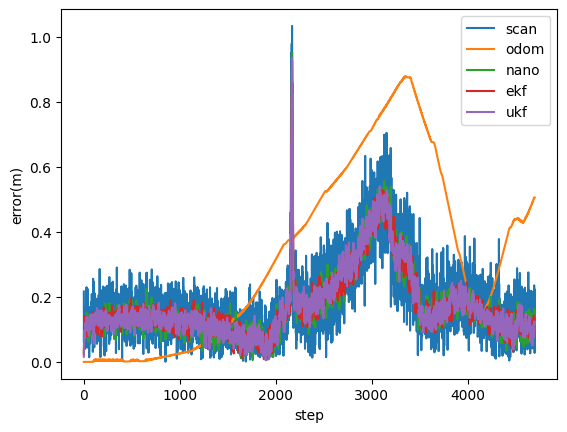

odom: 0.32720681356670767
scan: 0.18541726023741123
ekf:  0.17430304724332887
ukf:  0.1748855747663838
nano: 0.17364617301268012


In [60]:
ekf = np.linalg.norm(ground_truth[:l, :2] - ekf[:l, :2], axis=1)
odom = np.linalg.norm(ground_truth[:l, :2] - odom[:l, :2], axis=1)
nano = np.linalg.norm(ground_truth[:l, :2] - nano[:l, :2], axis=1)
ukf = np.linalg.norm(ground_truth[:l, :2] - ukf[:l, :2], axis=1)
scan_pose = np.linalg.norm(ground_truth[:l, :2] - scan_pose[:l, :2], axis=1)
# pf = np.linalg.norm(ground_truth[:l][:, :2] - pf[:l, :2], axis=1)
plt.figure()
plt.plot(scan_pose, label="scan")
plt.plot(odom, label="odom")
plt.plot(nano, label="nano")
plt.plot(ekf, label="ekf")
plt.plot(ukf, label="ukf")
# plt.plot(pf, label="pf")
plt.xlabel("step")
plt.ylabel("error(m)")
plt.legend()
plt.show()
print("odom:", np.mean(odom))
print("scan:", np.mean(scan_pose))
print("ekf: ", np.mean(ekf))
print("ukf: ", np.mean(ukf))
print("nano:", np.mean(nano))
# print("pf: ", np.mean(pf))